In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import seaborn as sns

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/gauraviiita/Supervised_ML/main/Datasets/MLR_datasets/Student_Performance.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [11]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [12]:
df["Extracurricular Activities"] = preprocessing.LabelEncoder().fit_transform(df["Extracurricular Activities"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int32  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 429.8 KB


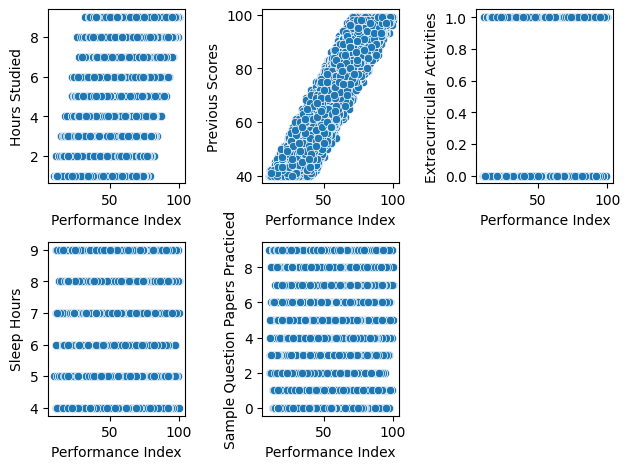

In [24]:
i=1
row = 2
col = int(np.ceil(len(df.columns)/row))
for key in df.iloc[:, :-1]:
    plt.subplot(row, col, i)
    sns.scatterplot(df, x="Performance Index", y=key)
    # plt.xlabel = "Performance Index"
    # plt.ylabel = key
    i+=1
plt.tight_layout()

In [15]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [16]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
print(x.shape)
print(y.shape)

(10000, 5)
(10000,)


In [17]:
std_x = preprocessing.scale(x)
std_y = preprocessing.scale(y)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(std_x, std_y, test_size=0.3, random_state=42)

In [19]:
y_train = y_train.reshape(-1,1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7000, 5)
(7000, 1)
(3000, 5)
(3000,)


In [20]:
model = LinearRegression()

In [21]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [22]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  0.011017946275758651
R2 score:  0.9890110607021136
